In [1]:
from keras.datasets import fashion_mnist

C:\Workspace\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
(trainX, trainY), (testX,testY) = fashion_mnist.load_data()

In [13]:
trainX[0].shape

(28, 28)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

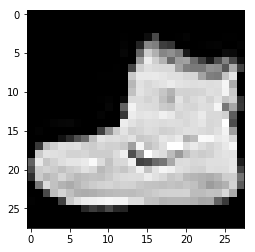

In [29]:
plt.imshow(trainX[0], cmap='gray')

### Noramlizing data

In [20]:
trainX = trainX/255.0

In [21]:
from keras.utils import to_categorical

In [35]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [59]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [70]:
def create_model(model_config):
    models = []
    for name,config in model_config.items():
        model = Sequential()
        model.add(Dense(config[0][1], input_dim=784, activation='relu'))
        for num,nodes in config[1:]:
            model.add(Dense(nodes, activation='relu'))
            #model.add(Dropout(.25))
            model.add(BatchNormalization())
        model.add(Dense(10, activation='softmax'))
        models.append(model)
    return models
    

In [71]:
model_config = {
    'A':[(1,700),(2,128)],
    'B':[(1,256),(2,128),(3,64),(4,32)]
}

In [72]:
models = create_model(model_config)

In [73]:
models[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 700)               549500    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               89728     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 641,030
Trainable params: 640,774
Non-trainable params: 256
_________________________________________________________________


In [74]:
models[1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
__________

In [75]:
trainX = trainX.reshape(60000,784)

In [76]:
testX = testX.reshape(10000,784)

In [77]:
all_history = []
for model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(trainX,trainY,validation_split=.2, epochs=10, batch_size=256, verbose=2)
    all_history.append(history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.4969 - acc: 0.8289 - val_loss: 0.5917 - val_acc: 0.7954
Epoch 2/10
 - 4s - loss: 0.3792 - acc: 0.8669 - val_loss: 0.4488 - val_acc: 0.8470
Epoch 3/10
 - 4s - loss: 0.3396 - acc: 0.8770 - val_loss: 0.4691 - val_acc: 0.8393
Epoch 4/10
 - 4s - loss: 0.3507 - acc: 0.8776 - val_loss: 0.4760 - val_acc: 0.8445
Epoch 5/10
 - 4s - loss: 0.3143 - acc: 0.8860 - val_loss: 0.3863 - val_acc: 0.8657
Epoch 6/10
 - 5s - loss: 0.3000 - acc: 0.8914 - val_loss: 0.3928 - val_acc: 0.8619
Epoch 7/10
 - 4s - loss: 0.2809 - acc: 0.8975 - val_loss: 0.3419 - val_acc: 0.8813
Epoch 8/10
 - 4s - loss: 0.2695 - acc: 0.9012 - val_loss: 0.3489 - val_acc: 0.8803
Epoch 9/10
 - 4s - loss: 0.2651 - acc: 0.9037 - val_loss: 0.3684 - val_acc: 0.8673
Epoch 10/10
 - 4s - loss: 0.2634 - acc: 0.9044 - val_loss: 0.3424 - val_acc: 0.8790
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.5741 - acc: 0.8094 - val_loss: 0.5005 - va

In [108]:
import numpy as np
np.argmax(models[1].predict(testX.reshape(10000,784)),axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [41]:
model.evaluate(testX.reshape(-1,784),testY)

10000/10000 [==============================] - 0s 25us/step


[0.4089719118833542, 0.8659]

In [78]:
val_acc = all_history[1].history['val_acc']

In [79]:
train_acc = all_history[1].history['acc']

In [48]:
h = all_history[1]

In [52]:
h.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

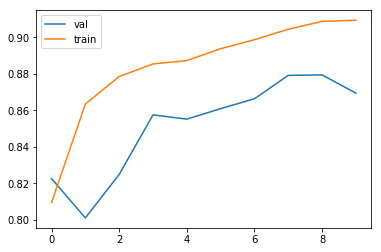

In [80]:
plt.plot(val_acc, label='val')
plt.plot(train_acc, label='train')
plt.legend()